<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Условия-задачи" data-toc-modified-id="Условия-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Условия задачи</a></span></li><li><span><a href="#Алгоритм-выполнения-проекта" data-toc-modified-id="Алгоритм-выполнения-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Алгоритм выполнения проекта</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Условия задачи
1. Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
2. При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
3. Бюджет на разработку скважин в регионе — 10 млрд рублей.
4. При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
5. После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Алгоритм выполнения проекта

1. Загрузить и подготовить данные.
2. Обучить и проверить модель для каждого региона:
    1. Разбить данные на обучающую и валидационную выборки.
    2. Обучить модель и сделайте предсказания на валидационной выборке.
    3. Сохраните предсказания и правильные ответы на валидационной выборке.
    4. Напечатать на экране средний запас предсказанного сырья и RMSE модели.
    5. Проанализировать результаты.
3. Подготовится к расчёту прибыли:
    1. Все ключевые значения для расчётов сохранить в отдельных переменных.
    2. Рассчитайть достаточный объём сырья для безубыточной разработки новой скважины. Сравнить полученный объём сырья со средним запасом в каждом регионе.
    3. Напишисать выводы по этапу подготовки расчёта прибыли.
4. Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
    1. Выбрать скважины с максимальными значениями предсказаний.
    2. Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям.
    3. Рассчитайть прибыль для полученного объёма сырья.
5. Посчитайть риски и прибыль для каждого региона:
    1. Применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    2. Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
    3. Написать выводы: предложить регион для разработки скважин и обосновать выбор.

## Загрузка и подготовка данных

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_validate, cross_val_predict, train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, make_scorer

In [6]:
data_regions = []

for i in range(3):
    path = f'datasets/geo_data_{i}.csv'
    if os.path.exists(path):
        data_regions.append(pd.read_csv(path))
    else:
        print('Что-то пошло не так')

In [7]:
ids = []
for i in range(3):
    print(f"Регион {i+1}")
    print("Информация о данных")
    display(data_regions[i].info())
    print("Первые пять записей")
    display(data_regions[i].head())
    print("Число дубликатов")
    print(data_regions[i].duplicated().sum()) 
    print("Пустые значения")
    print(data_regions[i].isna().sum()) 
    ids.append(data_regions[i]['id'])
    data_regions[i] = data_regions[i].drop('id', axis=1) 

Регион 1
Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Первые пять записей


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Число дубликатов
0
Пустые значения
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Регион 2
Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Первые пять записей


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Число дубликатов
0
Пустые значения
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Регион 3
Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Первые пять записей


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Число дубликатов
0
Пустые значения
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


**Вывод:** Менять типы данных не требуется, дубликатов нет, пропущенные значения отсутствуют.

## Обучение и проверка модели

In [8]:
features_regions = []
target_regions = []
for i in range(3):
    features_regions.append(data_regions[i].drop(['product'], axis=1))
    target_regions.append(data_regions[i]['product']) 
    

In [9]:
features_train_regions = []
features_valid_regions = []
target_train_regions = []
target_valid_regions = []
for i in range(3):
    features_train, features_valid, target_train, target_valid = train_test_split(
        features_regions[i], target_regions[i], test_size=0.25, random_state=12345)
    features_train_regions.append(features_train)
    features_valid_regions.append(features_valid)
    target_train_regions.append(target_train)
    target_valid_regions.append(target_valid.reset_index(drop=True))

In [10]:
print(features_train_regions[0].shape, features_valid_regions[0].shape)

(75000, 3) (25000, 3)


In [11]:
scaler = StandardScaler() 
features_train_regions_tmp = []
features_valid_regions_tmp = []
for i in range(3):
    scaler.fit(features_train_regions[i])
    features_train_regions_tmp.append(scaler.transform(features_train_regions[i])) 
    features_valid_regions_tmp.append(scaler.transform(features_valid_regions[i]))


In [12]:
print(features_train_regions_tmp[0].shape, features_valid_regions_tmp[0].shape)

(75000, 3) (25000, 3)


In [13]:
model = LinearRegression()
predictions = [] 
RMSE_values = [] 
region_prediction_sum = [] 
mean_region_prediction = [] 

for k in range(3):
    model.fit(features_train_regions_tmp[k], target_train_regions[k])
    
    predictions.append(pd.Series(model.predict(features_valid_regions_tmp[k])))
    
    
    RMSE_values.append(mean_squared_error(target_valid_regions[k], predictions[k])**0.5)
    region_prediction_sum.append(predictions[k].sum())
    mean_region_prediction.append(predictions[k].mean())
    

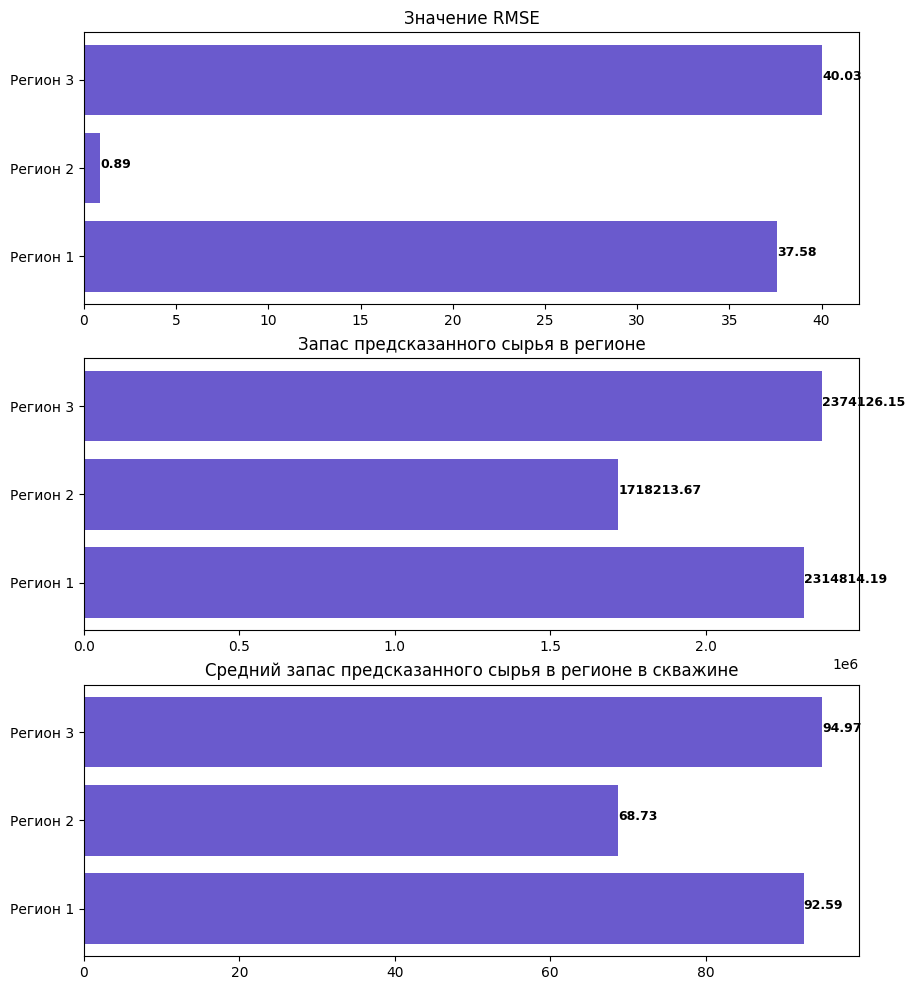

In [35]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, figsize=(15, 5))

region_names = ['Регион 1', 'Регион 2', 'Регион 3']
axs[0].barh(region_names, RMSE_values, color='slateblue')
axs[1].barh(region_names, region_prediction_sum, color='slateblue')
axs[2].barh(region_names, mean_region_prediction, color='slateblue')

for k in range(3):
    for i in axs[k].patches:
        axs[k].text(i.get_width(), i.get_y()+0.4,
                 str(round((i.get_width()), 2)),
                 fontsize=9, fontweight='bold',
                 color='black')
    
axs[0].set_title('Значение RMSE')
axs[1].set_title('Запас предсказанного сырья в регионе')
axs[2].set_title('Средний запас предсказанного сырья в регионе в скважине')

fig.set_figheight(12)
fig.set_figwidth(10)


**Вывод:** Лучше всего модель делает предсказания для данных региона 2. Самое высокий запас сырья в регионе 3, а самый низкий в регионе 2.

## Подготовка к расчёту прибыли

In [36]:
BUDGET = 10_000_000_000
INCOME_PER_THOUSAND_BAREL = 450_000 
NUMBER_OF_POINTS = 200 

NEEDED_NUMBER_OF_PRODUCTS_PER_POINT = BUDGET / (NUMBER_OF_POINTS * INCOME_PER_THOUSAND_BAREL)


In [37]:
print('Нужное число продуктов в точке добычи для получения нулевого дохода:', NEEDED_NUMBER_OF_PRODUCTS_PER_POINT)

Нужное число продуктов в точке добычи для получения нулевого дохода: 111.11111111111111


In [38]:
def income(predictions, valid, price, budget): 
    best_200_indexes = predictions.sort_values(ascending=False)[:200].index
    best_200 = valid.loc[best_200_indexes]
    return best_200.sum() * price - budget

**Вывод:** Во всех регионах средний объем запасов недостаточно высокий для безубыточной деятельности.

## Расчёт прибыли и рисков 

In [39]:
state = np.random.RandomState(12345)
lowers = []
uppers = []
means =[]
for k in range(3):
    incomes = []
    for i in range(1000):
        subsample = predictions[k].sample(n=500, replace=True, random_state=state)
        incomes.append(income(subsample, target_valid_regions[k], INCOME_PER_THOUSAND_BAREL, BUDGET))

    incomes = pd.Series(incomes)  
    
   
    means.append(incomes.mean()) 
    lower = incomes.quantile(0.025)
    lowers.append(lower)
    
    upper = incomes.quantile(0.975)
    uppers.append(upper)

    print(f"Риск убытков в 200 лучших точках из 500 выбранных в регионе {(k+1)}: {sum(incomes<0)*100/incomes.shape[0]}%")

Риск убытков в 200 лучших точках из 500 выбранных в регионе 1: 6.9%
Риск убытков в 200 лучших точках из 500 выбранных в регионе 2: 0.7%
Риск убытков в 200 лучших точках из 500 выбранных в регионе 3: 6.5%


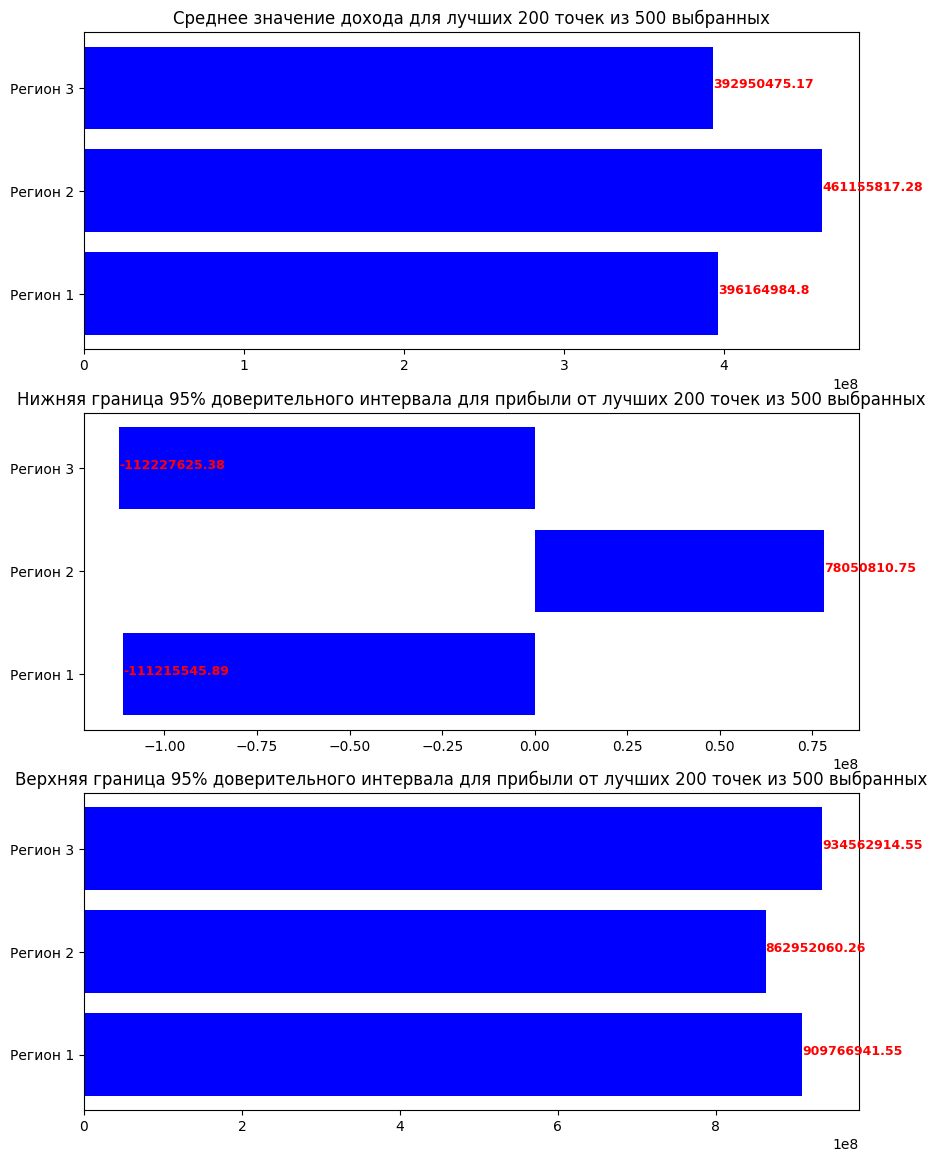

In [41]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, figsize=(15, 5))

axs[0].barh(region_names, means, color='blue')
axs[1].barh(region_names, lowers, color='blue')
axs[2].barh(region_names, uppers, color='blue')

for k in range(3):
    for i in axs[k].patches:
        axs[k].text(i.get_width(), i.get_y()+0.4,
                 str(round((i.get_width()), 2)),
                 fontsize=9, fontweight='bold',
                 color='red')
    
axs[0].set_title('Среднее значение дохода для лучших 200 точек из 500 выбранных')
axs[1].set_title('Нижняя граница 95% доверительного интервала для прибыли от лучших 200 точек из 500 выбранных')
axs[2].set_title('Верхняя граница 95% доверительного интервала для прибыли от лучших 200 точек из 500 выбранных')

fig.set_figheight(14)
fig.set_figwidth(10)

**Вывод:**
В регионе 2 самая маленькая вероятность потерять деньги при разработке месторождения, среднее значение дохода самое большое. В регионе 2 самая высокая нижняя граница доверительного интервала, верхняя граница самая маленькая. При этом во всех регионах в 200 лучших точках вероятность потерять деньги ниже 7 %.

Имеет смысл выбрать регион 2, в 200 лучших точках из 500 случайно выбранных там самая высокая прибыль, а вероятность потерять деньги самая маленькая. В отличии от остальных регионов, нижняя граница 95 % доверительного интервала положительная.

## Выводы

1. Лучше всего модель делает предсказания для данных региона 2. Самое высокий запас сырья в регионе 3, а самый низкий во втором регионе.
2. Во всех регионах средний объем запасов недостаточно высок для безубыточной деятельности.
3. Имеет смысл выбрать регион 2, в 200 лучших точка там самая высокая прибыль, а вероятность потерять деньги самая маленькая, в отличии от остальных регионов, нижняя граница 95 % доверительного интервала положительная. 